In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv("stress.csv")

In [4]:
data

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [5]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

C:\Users\SUDHEER\OneDrive\Documents\Downloads\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [6]:
from nltk.corpus import stopwords

In [7]:
import string

In [8]:
stopwords=set(stopwords.words('english'))

In [9]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
# pip install --upgrade wordcloud matplotlib numpy pillow

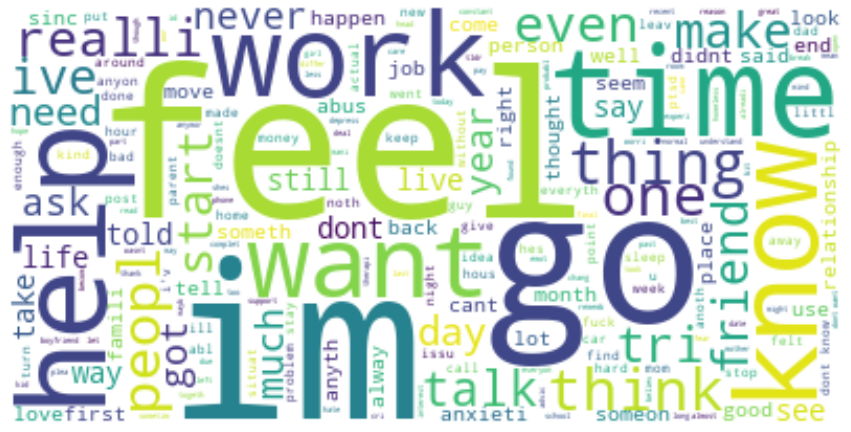

In [12]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, 
                      #background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data["label"]=data["label"].map({0:"No Stress",1:"Stress"})

In [ ]:
data=data[["text","label"]]

In [ ]:
data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
x=np.array(data["text"])
y=np.array(data["label"])

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
model = BernoulliNB()

In [ ]:
model.fit(xtrain,ytrain)

In [ ]:
from sklearn.metrics import accuracy_score
output=model.predict(xtest)
accuracy = accuracy_score(ytest, output)
print(accuracy*100)


In [23]:
user = input("Text")
data=cv.transform(['user']).toarray()
output=model.predict(data)

Textiam feeling hungry


In [24]:
output

array(['No Stress'], dtype='<U9')

In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
classifier = svm.SVC(kernel='linear')  # You can choose different kernels

# Fit the model on the training data
classifier.fit(xtrain, ytrain)

# Predict on the test data
y_pred = classifier.predict(xtest)

# Evaluate the model (for classification)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy*100)

67.95774647887323


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Fit the model on the training data
classifier.fit(xtrain, ytrain)

# Predict on the test data
y_pred = classifier.predict(xtest)

# Evaluate the model (for classification)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy*100)

70.77464788732394


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(xtrain, ytrain)

# Predict on the test data
y_pred = classifier.predict(xtest)

# Evaluate the model (for classification)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy*100)

69.83568075117371
